In [60]:
using Graphs
using GraphPlot
using GraphIO

using Colors

using Cairo, Compose

# A = adjacency_matrix(KarateGraph())

using DrWatson
quickactivate(@__DIR__)

using PolarizationFramework

In [6]:
g_karate = KarateGraph()

file = datadir("highschool13", "Highschool13-class2BIO1.lg")
g_high = loadgraph(file)

file = datadir("windsurfers-interactions", "out.moreno_beach_beach")
g_wind = loadgraph(file, "graph_key", NETFormat())

{43, 336} undirected simple Int64 graph

In [62]:
# testing membership
membership = [1,1,1,1,1,1,1,1,2,1,1,1,1,1,2,2,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2]

specified_division = [
    [3, 14, 20, 2, 1, 4, 8, 18, 22, 12, 13, 5, 11, 6, 7, 17],
    [21, 30, 19, 24, 16, 27, 15, 23, 33, 34, 28, 29, 32, 26, 25, 31, 10, 9],
]

N=maximum(maximum(specified_division))

tmem = zeros(Int,N)
for i=1:N
    if i in specified_division[1]
        tmem[i] = 1
    elseif i in specified_division[2]
        tmem[i] = 2
    else
        error("i in neither group")
    end
end

@assert tmem == membership

AssertionError: AssertionError: tmem == membership

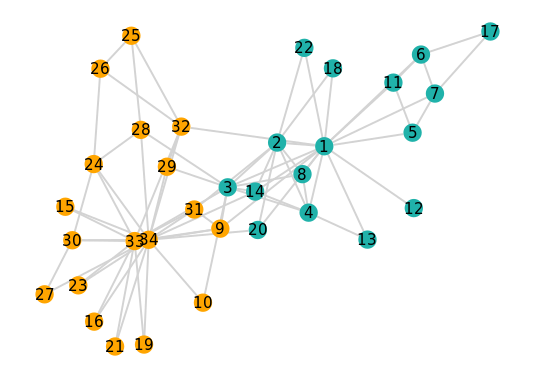

In [65]:
# nodes membership
membership = [1,1,1,1,1,1,1,1,2,1,1,1,1,1,2,2,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2]
membership = tmem

nodelabel = collect(1:nv(g_karate))
nodecolor = [colorant"lightseagreen", colorant"orange"]
# membership color
nodefillc = nodecolor[membership]
gp_kar = gplot(g_karate, nodefillc=nodefillc, nodelabel=nodelabel)

In [86]:
draw(PDF(projectdir("_research", "karate.pdf"), 20cm, 10cm), gp_kar)

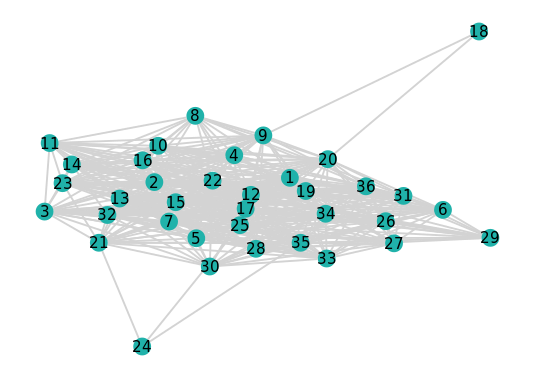

In [84]:
# nodes membership
N = nv(g_high)
membership = ones(Int, N)

nodelabel = collect(1:N)
nodecolor = [colorant"lightseagreen", colorant"orange"]
# membership color
nodefillc = nodecolor[membership]
gp_high = gplot(g_high, nodefillc=nodefillc, nodelabel=nodelabel)

In [85]:
# researchdir
draw(PDF(projectdir("_research", "high.pdf"), 20cm, 10cm), gp_high)

In [74]:

specified_division = [
    [
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        11,
        14,
        15,
        16,
        17,
        20,
        21,
        26,
        30,
        31,
        32,
        37,
        38,
        39,
        41,
        43,
    ],
    [9, 10, 12, 13, 18, 19, 22, 23, 24, 25, 27, 28, 29, 33, 34, 35, 36, 40, 42],
]

N=nv(g_wind)

tmem = zeros(Int,N)
for i=1:N
    if i in specified_division[1]
        tmem[i] = 1
    elseif i in specified_division[2]
        tmem[i] = 2
    else
        error("i in neither group")
    end
end


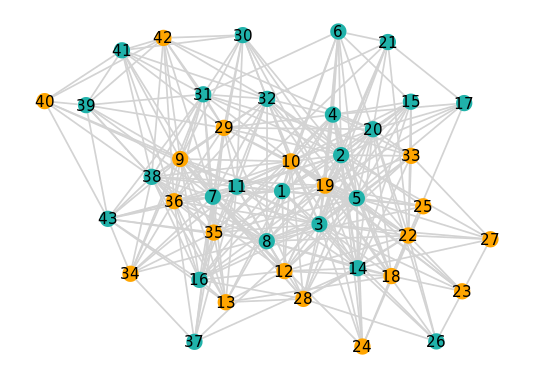

In [80]:
# nodes membership
membership = tmem

nodelabel = collect(1:nv(g_wind))
nodecolor = [colorant"lightseagreen", colorant"orange"]
# membership color
nodefillc = nodecolor[membership]
gp_wind = gplot(g_wind, layout = spring_layout, nodefillc=nodefillc, nodelabel=nodelabel)

In [87]:
# researchdir
draw(PDF(projectdir("_research", "wind.pdf"), 20cm, 10cm), gp_wind)

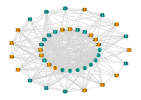

In [42]:
nlist = Vector{Vector{Int}}() # two shells
push!(nlist, specified_division[1]) # first shell
push!(nlist, specified_division[2]) # second shell

locs_x, locs_y = shell_layout(g_wind, nlist)


gplot(g_wind, locs_x, locs_y, nodefillc=nodefillc, nodelabel=nodelabel)

In [43]:
nlist

2-element Vector{Vector{Int64}}:
 [1, 2, 3, 4, 5, 6, 7, 8, 11, 14  …  21, 26, 30, 31, 32, 37, 38, 39, 41, 43]
 [9, 10, 12, 13, 18, 19, 22, 23, 24, 25, 27, 28, 29, 33, 34, 35, 36, 40, 42]